<a href="https://colab.research.google.com/github/DrBooma/NEURAL-NETWORK/blob/main/MNIST_DNN(Handwritten%20Image).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting

In [ ]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Below shows some examples

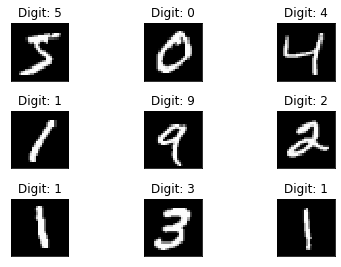

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


![alt text](https://miro.medium.com/max/306/1*nlfLUgHUEj5vW7WVJpxY-g.png)

In [ ]:
# let's print the shape 
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784) #28*28 = 784
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# normalizing the data to help with the training
 X_train/= 255    #convert to (0 to 1) x_train=x_train/255
X_test /= 255

In [ ]:
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


one-hot encoding

 5 = [0,0,0,0,1,0,0,0,0]

 0 = [1,0,0,0,0,0,0,0,0]
 
 8 = [0,0,0,0,0,0,0,1,0]

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


# Building the Network

![alt text](https://nextjournal.com/data/1220CC01595BBCB08CCAC75AC0A373519699CFBC6FB7E6118A92DDB89EDB63490CFE?content-type=image%2Fpng&filename=text4298.png)

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# training the model and saving metrics in history
#Calculate the iteration: (no. of train data/batch_size)*epochs= (60000/128)*20
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 22s 17ms/step - loss: 0.4538 - accuracy: 0.8648 - val_loss: 0.1141 - val_accuracy: 0.9659
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1075 - accuracy: 0.9671 - val_loss: 0.0789 - val_accuracy: 0.9740
Epoch 3/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0711 - accuracy: 0.9776 - val_loss: 0.0704 - val_accuracy: 0.9776
Epoch 4/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0559 - accuracy: 0.9821 - val_loss: 0.0662 - val_accuracy: 0.9793
Epoch 5/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0430 - accuracy: 0.9860 - val_loss: 0.0692 - val_accuracy: 0.9810
Epoch 6/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0655 - val_accuracy: 0.9822
Epoch 7/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0272 - accuracy: 0.9908 - val_loss: 0.0922 - val_accuracy: 0.973

In [ ]:
# saving the model

import os
model_name = 'keras_mnist.h5'
model.save(model_name)
print('Saved trained model at %s ' % model_name)

Saved trained model at keras_mnist.h5 


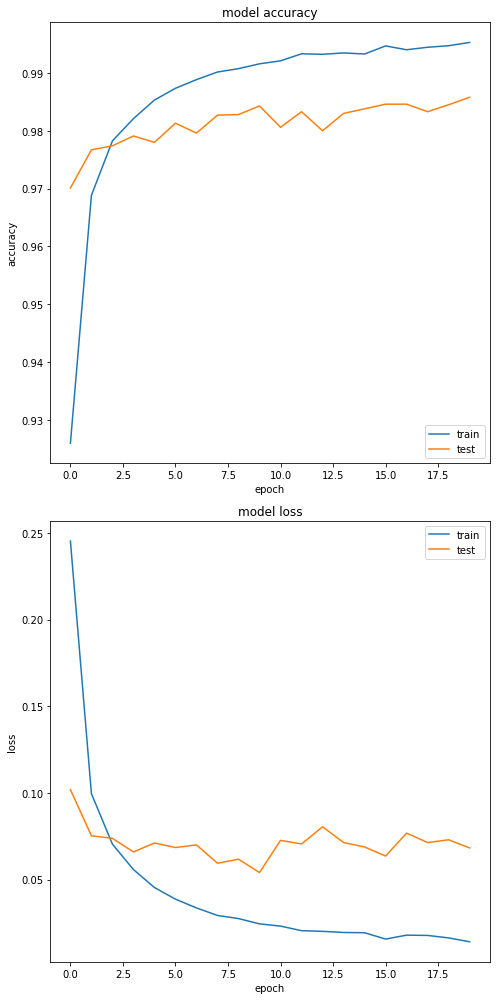

In [ ]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()



In [ ]:
from keras.models import load_model
mnist_model = load_model('keras_mnist.h5')
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0684 - accuracy: 0.9836
Test Loss 0.068421371281147
Test Accuracy 0.9836000204086304


In [ ]:
#  predictions on the test set

predicted_classes = mnist_model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


9836  classified correctly
164  classified incorrectly


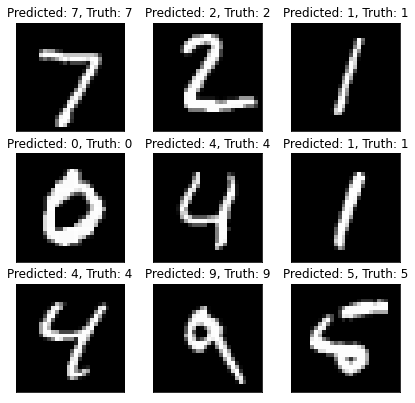

In [ ]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

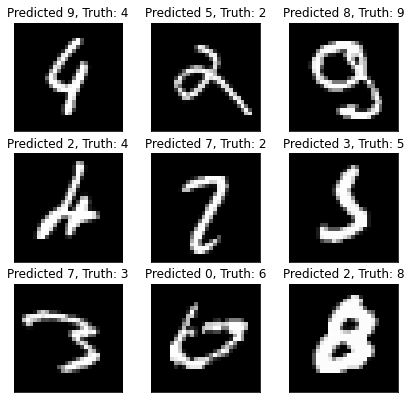

In [ ]:
# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

In [ ]:
import cv2
from google.colab.patches import cv2_imshow




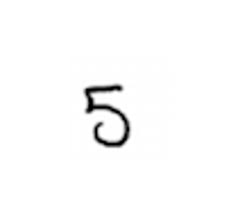

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/5.jpg',0)
cv2_imshow(img)


In [ ]:
img = img.reshape(1, 784)
#img1= img.astype('float32')
#cv2_imshow(img)
predicted_classes = mnist_model.predict_classes(img1)
print(predicted_classes)

ValueError: ignored

In [ ]:
model.compile(    loss='categorical_crossentropy',  metrics=['accuracy'], optimizer=adam(lr=0.005))//hyperparameter tuning
